<center>
    <h1> INF393 - Máquinas de Aprendizaje  </h1>
    <h2> Tarea 3 </h2>
    <h3> Universidad Técnica Federico Santa Maria </h3>
    
</center>

_Diciembre 2017_
<p>Profesor: R. Ñanculef</p>
 <p>Ayudante: Francisco Mena</p>
 <p>Integrantes: 
 <br>Alfredo Silva,
 201373511-8</br>
 <br>Fernando Llorens, 201373528-2</br>
 

 
</p>

<h1>1. Small Circle inside Large Circle</h1>
<p>
El objetivo de esta sección es experimentar con algunos modelos no-lineales sobre un problema de juguete
generado para visualizar algoritmos de clustering. Se trata de un problema de clasificación a todas luces
linealmente inseparable, en el sentido que, si denotamos por $x∈R^{2}$ un patrón de entrada y por $y ∈\{−1, 1\}$
su correspondiente etiqueta, no existen $w∈R^{2}$, $b∈R$ tal que $y(w^{T} x + b) ≥ ρ > 0$. El problema nos permite
hacer un recorrido rápido por las grandes ideas en la búsqueda de la no-linealidad.
</p>

<p>(a) Escriba una función que genere (aleatoriamente) n datos etiquetados de la forma $\{(x_1, y_1), . . . ,(x_n, y_n)\}$,
$x_{i}∈R^{2}$, $y_{i}∈\{0, 1\}$, con una distribución de probabilidad que refleje la configuración linealmente
inseparable que muestra la Fig. 1 (En el PDF original)
. Utilice esta función para crear 1000 datos de entrenamiento y 1000 datos de pruebas. Para medir la tendencia de los modelos a sobre-ajuste, agregue un 5 % de ruido al dataset, generando X’s cercanos a la frontera. Genere un gráfico que muestre datos de entrenamiento y pruebas, identificando cada clase con un color diferente.</p>

In [8]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
                        np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp),
                                np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test
X_train, Y_train, X_test, Y_test = do_circles()

<p>
Para lo que sigue de la actividad utilice la siguiente función para graficar las fronteras de clasificación en
base a la probabilidad, definida por un algoritmo, de un ejemplo a pertenecer a una clase en particular.
</p>

In [27]:
import matplotlib.pyplot as plt
def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='seismic')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],
    levels=[-2, 0, 2])
    plt.show()

<p>
(b) Demuestre experimentalmente que una red neuronal artificial correspondiente a 1 sola neurona (i.e. sin capas escondidas) no puede resolver satisfactoriamente el problema. Puede utilizar la función de activación y el método de entrenamiento que prefiera. Sea convincente: por ejemplo, intente modificar
los parámetros de la máquina de aprendizaje, reportando métricas que permitan evaluar el desempeño
del modelo en el problema con cada cambio efectuado. Adapte también la función plot classifier para
que represente gráficamente la solución encontrada por la red neuronal. Describa y explique lo que
observa, reportando gráficos de la solución sólo para algunos casos representativos.
</p>

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import RMSprop
n_h=1
test_acc =[]

model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(n_h, init='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1)
scores1 = model.evaluate(X_test, Y_test)
test_acc.append(scores1[1])

model2 = Sequential()
model2.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='linear'))
model2.add(Dense(n_h, init='uniform', activation='sigmoid'))
model2.compile(optimizer=SGD(lr=0.5), loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, Y_train, epochs=100, batch_size=100, verbose=1)
scores2 = model2.evaluate(X_test, Y_test)
test_acc.append(scores2[1])

model3 = Sequential()
model3.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model3.add(Dense(n_h, init='uniform', activation='sigmoid'))
model3.compile(optimizer=SGD(lr=1), loss='categorical_hinge', metrics=['accuracy'])
model3.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1)
scores3 = model3.evaluate(X_test, Y_test)
test_acc.append(scores3[1])

model4 = Sequential()
model4.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model4.add(Dense(n_h, init='uniform', activation='hard_sigmoid'))
model4.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model4.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1)
scores4 = model4.evaluate(X_test, Y_test)
test_acc.append(scores4[1])

model5 = Sequential()
model5.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='elu'))
model5.add(Dense(n_h, init='uniform', activation='hard_sigmoid'))
model5.compile(optimizer=SGD(lr=1), loss='cosine_proximity', metrics=['accuracy'])
model5.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1)
scores5 = model5.evaluate(X_test, Y_test)
test_acc.append(scores5[1])


        
model6 = Sequential()
model6.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model6.add(Dense(n_h, init='uniform', activation='sigmoid'))
model6.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model6.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1)
scores6 = model6.evaluate(X_test, Y_test)
test_acc.append(scores6[1])

for i in range(len(test_acc)):
    print("Score del modelo #"+str(i+1)+": "+ str(test_acc[i]))

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
1000/1000 [==============================] - 1s 983us/step - loss: 0.6938 - acc: 0.5050
Epoch 2/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.6942 - acc: 0.4950
Epoch 3/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6935 - acc: 0.5290
Epoch 4/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.6940 - acc: 0.5100
Epoch 5/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.6911 - acc: 0.5490
Epoch 6/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6868 - acc: 0.5900
Epoch 7/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.6761 - acc: 0.5890
Epoch 8/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6565 - acc: 0.6230
Epoch 9/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.6294 - acc: 0.6300
Epoch 10/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.6071 - acc: 0.6700
Epoch 11/50
1000/1

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/100
1000/1000 [==============================] - 1s 841us/step - loss: 0.6934 - acc: 0.4940
Epoch 2/100
1000/1000 [==============================] - 0s 24us/step - loss: 0.6945 - acc: 0.4870
Epoch 3/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.6934 - acc: 0.4890
Epoch 4/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.6943 - acc: 0.5070
Epoch 5/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.6934 - acc: 0.5220
Epoch 6/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.6938 - acc: 0.5070
Epoch 7/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.6934 - acc: 0.4970
Epoch 8/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.6941 - acc: 0.4930
Epoch 9/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.6934 - acc: 0.4860
Epoch 10/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.6932 - acc: 0.5070
Epoch 11

1000/1000 [==============================] - 0s 16us/step - loss: 0.6925 - acc: 0.5590
Epoch 84/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.6925 - acc: 0.5610
Epoch 85/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.6926 - acc: 0.5340
Epoch 86/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.6928 - acc: 0.6690
Epoch 87/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.6923 - acc: 0.6170
Epoch 88/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.6924 - acc: 0.4920
Epoch 89/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.6926 - acc: 0.6240
Epoch 90/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.6923 - acc: 0.5700
Epoch 91/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.6925 - acc: 0.6520
Epoch 92/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.6923 - acc: 0.6110
Epoch 93/100


C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/50
1000/1000 [==============================] - 1s 848us/step - loss: 0.9931 - acc: 0.4950
Epoch 2/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.9929 - acc: 0.5070
Epoch 3/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.9927 - acc: 0.5070
Epoch 4/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.9926 - acc: 0.5070
Epoch 5/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.9924 - acc: 0.5070
Epoch 6/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.9922 - acc: 0.5070
Epoch 7/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.9917 - acc: 0.5070
Epoch 8/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.9909 - acc: 0.5070
Epoch 9/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.9898 - acc: 0.5070
Epoch 10/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.9882 - acc: 0.5070
Epoch 11/50
1000/1

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="hard_sigmoid", kernel_initializer="uniform")`


Epoch 1/50
1000/1000 [==============================] - 1s 905us/step - loss: 0.6940 - acc: 0.4660
Epoch 2/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.6942 - acc: 0.5030
Epoch 3/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6941 - acc: 0.4890
Epoch 4/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6934 - acc: 0.5090
Epoch 5/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6937 - acc: 0.4990
Epoch 6/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6938 - acc: 0.4830
Epoch 7/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6934 - acc: 0.5070
Epoch 8/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6937 - acc: 0.4750
Epoch 9/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6936 - acc: 0.4950
Epoch 10/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6939 - acc: 0.4830
Epoch 11/50
1000/1

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="hard_sigmoid", kernel_initializer="uniform")`


Epoch 1/50
1000/1000 [==============================] - 1s 887us/step - loss: -0.5070 - acc: 0.5020
Epoch 2/50
1000/1000 [==============================] - 0s 20us/step - loss: -0.5070 - acc: 0.5020
Epoch 3/50
1000/1000 [==============================] - 0s 20us/step - loss: -0.5070 - acc: 0.5020
Epoch 4/50
1000/1000 [==============================] - 0s 20us/step - loss: -0.5070 - acc: 0.5030
Epoch 5/50
1000/1000 [==============================] - 0s 20us/step - loss: -0.5070 - acc: 0.5030
Epoch 6/50
1000/1000 [==============================] - 0s 24us/step - loss: -0.5070 - acc: 0.5030
Epoch 7/50
1000/1000 [==============================] - 0s 20us/step - loss: -0.5070 - acc: 0.5030
Epoch 8/50
1000/1000 [==============================] - 0s 16us/step - loss: -0.5070 - acc: 0.5030
Epoch 9/50
1000/1000 [==============================] - 0s 16us/step - loss: -0.5070 - acc: 0.5030
Epoch 10/50
1000/1000 [==============================] - 0s 24us/step - loss: -0.5070 - acc: 0.5030
Epoch 11

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/50
1000/1000 [==============================] - 1s 926us/step - loss: 0.6932 - acc: 0.4270
Epoch 2/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6932 - acc: 0.4690
Epoch 3/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6932 - acc: 0.5100
Epoch 4/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6931 - acc: 0.5070
Epoch 5/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6931 - acc: 0.5070
Epoch 6/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.6931 - acc: 0.5070
Epoch 7/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6931 - acc: 0.5070
Epoch 8/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6931 - acc: 0.5070
Epoch 9/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6931 - acc: 0.5070
Epoch 10/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6931 - acc: 0.5070
Epoch 11/50
1000/1

C:\Users\Alfredo\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


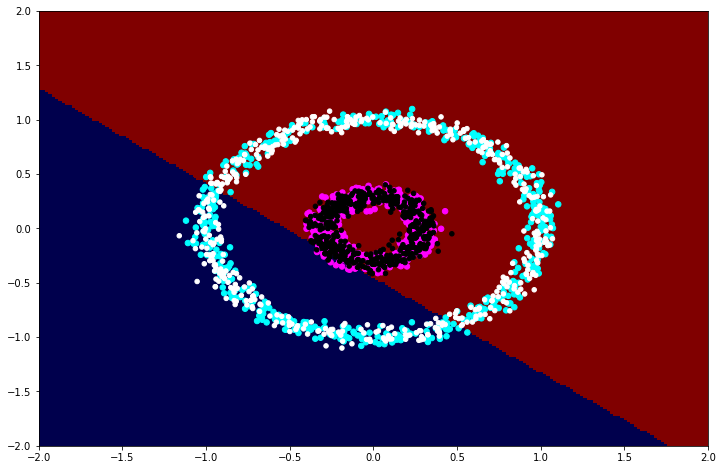

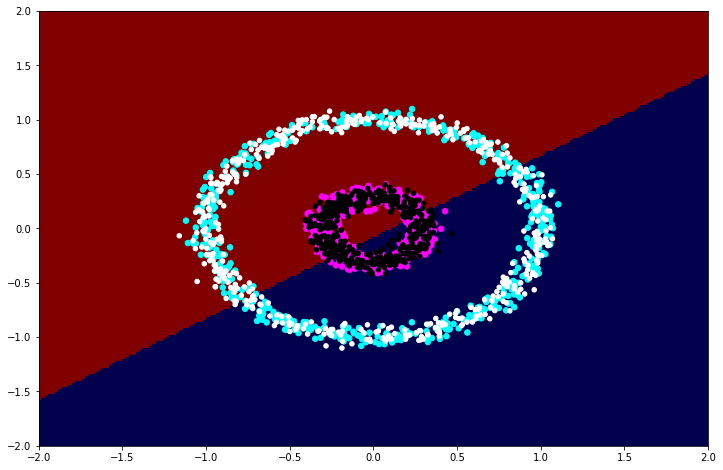

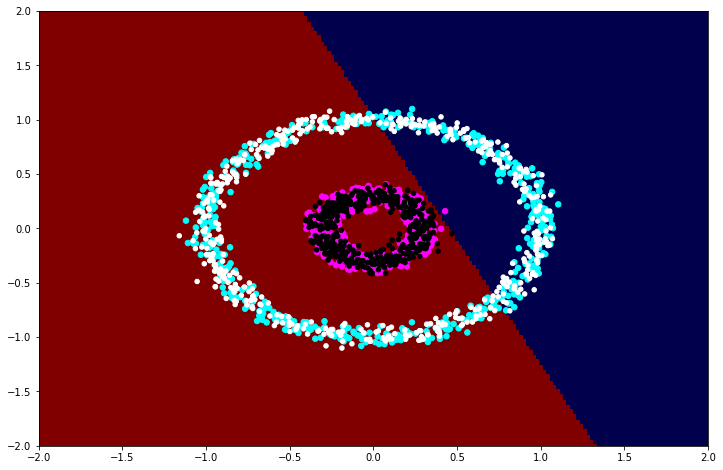

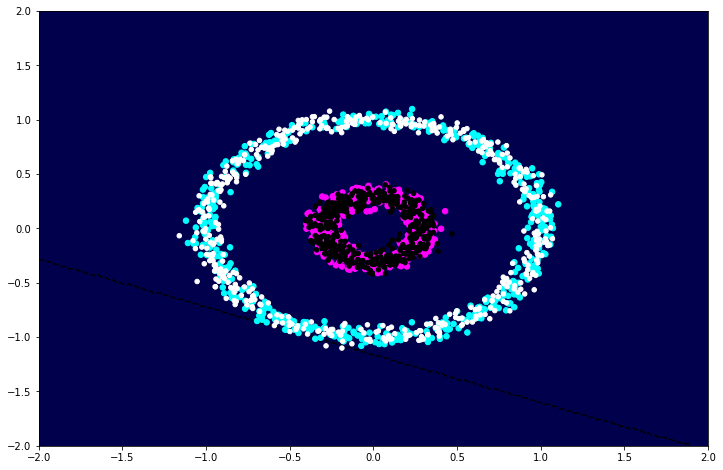

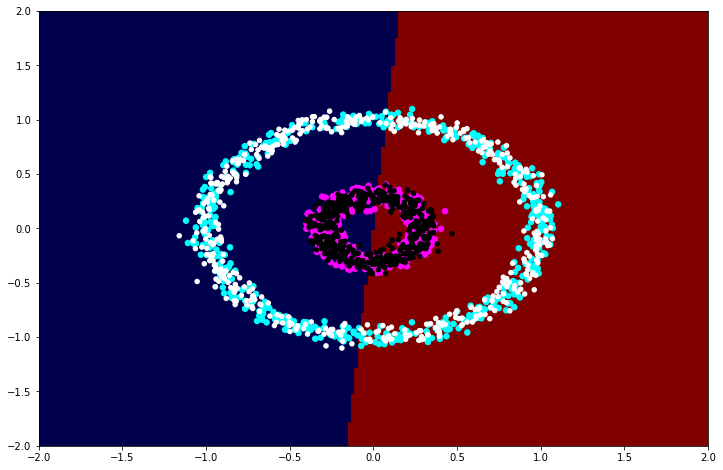

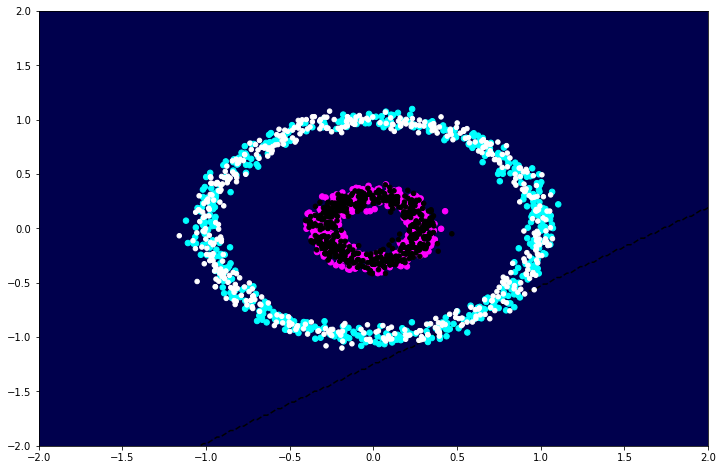

In [40]:
plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")
plot_classifier(model2,X_train,Y_train,X_test,Y_test,"ann")
plot_classifier(model3,X_train,Y_train,X_test,Y_test,"ann")
plot_classifier(model4,X_train,Y_train,X_test,Y_test,"ann")
plot_classifier(model5,X_train,Y_train,X_test,Y_test,"ann")
plot_classifier(model6,X_train,Y_train,X_test,Y_test,"ann")

<p>
Entrenamos 6 redes diferentes, como se puede ver y ni una fue capaz de entregar una accuracy de más del 60% aproximadamente. Al revisar sus límites se eude ver que solo generaron límites de decisión lineales sin importar que parametros se le entregaran a la red, incluso en algunos casos ni siquiera puedo generar una distinción. Por lo que experimentalmente no encontramos manera alguna que una red de una neurona pudiera lograr la división.
</p>

<p>
(c) Demuestre experimentalmente que una red neuronal artificial con 1 capa escondida puede resolver satisfactoriamente
el problema obtenido en (a). Puede utilizar la arquitectura y el método de entrenamiento
que prefiera, pero en esta actividad puede optar tranquilamente por usar los hiper-parámetros que se
entregan como referencia en el código de ejemplo. Cambie el número de neuronas $N_h$ en la red entre 2 y 32 en potencias de 2, graficando el error de entrenamiento y pruebas como función de $N_h$. Describa y explique lo que observa. Utilice la función plot classifier, diseñada anteriormente, para construir gráficos
de la solución en algunos casos representativos.

</p>

Epoch 1/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6934 - acc: 0.5050
Epoch 2/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6938 - acc: 0.4700
Epoch 3/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6941 - acc: 0.4950
Epoch 4/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.6929 - acc: 0.5000
Epoch 5/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.6906 - acc: 0.5360
Epoch 6/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6830 - acc: 0.6430
Epoch 7/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.6667 - acc: 0.6180
Epoch 8/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6394 - acc: 0.6440
Epoch 9/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6139 - acc: 0.6500
Epoch 10/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.5915 - acc: 0.6800
Epoch 11/50
1000/100

C:\Users\Alfredo\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


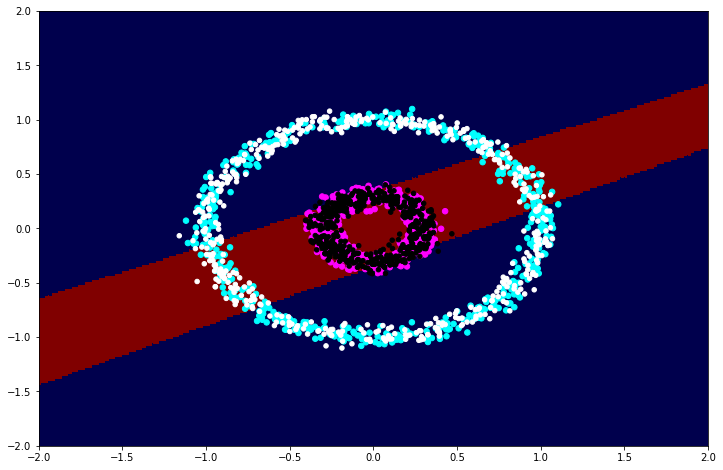

Epoch 1/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6935 - acc: 0.4960
Epoch 2/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6938 - acc: 0.5120
Epoch 3/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6908 - acc: 0.5440
Epoch 4/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6844 - acc: 0.5840
Epoch 5/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6679 - acc: 0.6370
Epoch 6/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6388 - acc: 0.6660
Epoch 7/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.5954 - acc: 0.7250
Epoch 8/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.5404 - acc: 0.8170
Epoch 9/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.4751 - acc: 0.8710
Epoch 10/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.4067 - acc: 0.9030
Epoch 11/50
1000/100

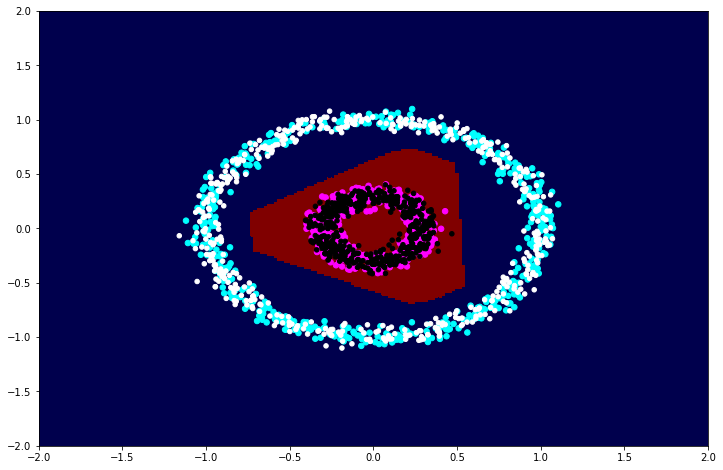

Epoch 1/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6924 - acc: 0.5130
Epoch 2/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6925 - acc: 0.5120
Epoch 3/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.6909 - acc: 0.5580
Epoch 4/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.6816 - acc: 0.6550
Epoch 5/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6587 - acc: 0.7360
Epoch 6/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.6094 - acc: 0.8470
Epoch 7/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.5328 - acc: 0.9050
Epoch 8/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.4293 - acc: 0.9470
Epoch 9/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.3237 - acc: 0.9910
Epoch 10/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.2348 - acc: 1.0000
Epoch 11/50
1000/100

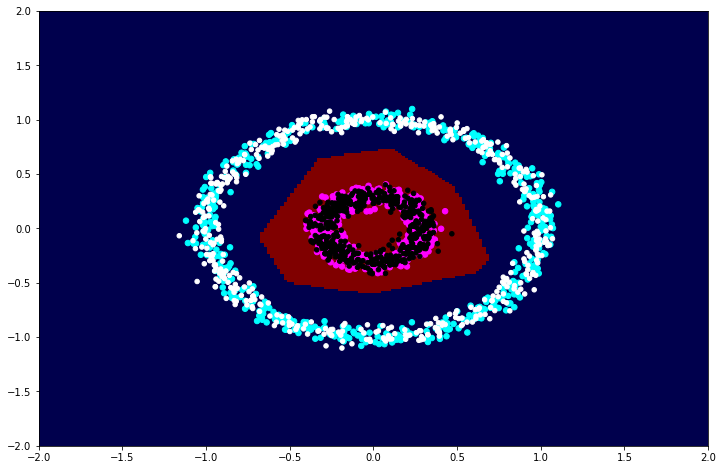

Epoch 1/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6936 - acc: 0.4910
Epoch 2/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6919 - acc: 0.5400
Epoch 3/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.6885 - acc: 0.5930
Epoch 4/50
1000/1000 [==============================] - 0s 21us/step - loss: 0.6780 - acc: 0.6560
Epoch 5/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6511 - acc: 0.7790
Epoch 6/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.5967 - acc: 0.8320
Epoch 7/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.5123 - acc: 0.9020
Epoch 8/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.4050 - acc: 0.9590
Epoch 9/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.2975 - acc: 0.9990
Epoch 10/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.2103 - acc: 1.0000
Epoch 11/50
1000/100

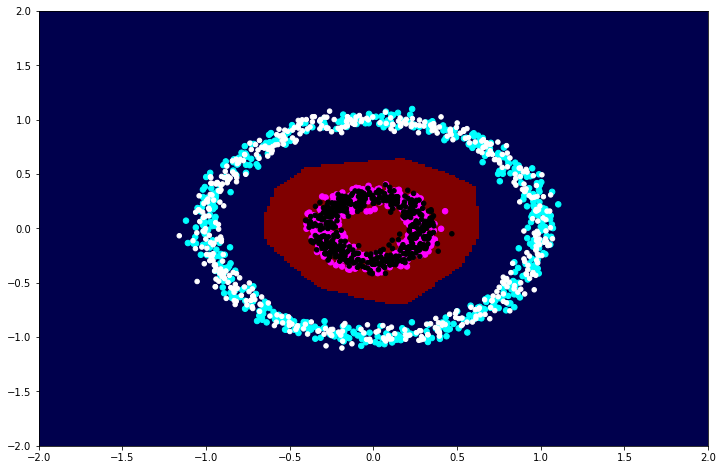

Epoch 1/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6924 - acc: 0.4880
Epoch 2/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6882 - acc: 0.5290
Epoch 3/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.6762 - acc: 0.6850
Epoch 4/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6493 - acc: 0.7420
Epoch 5/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.5847 - acc: 0.9190
Epoch 6/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.4841 - acc: 0.9720
Epoch 7/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.3669 - acc: 0.9940
Epoch 8/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.2626 - acc: 1.0000
Epoch 9/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.1875 - acc: 1.0000
Epoch 10/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.1378 - acc: 1.0000
Epoch 11/50
1000/100

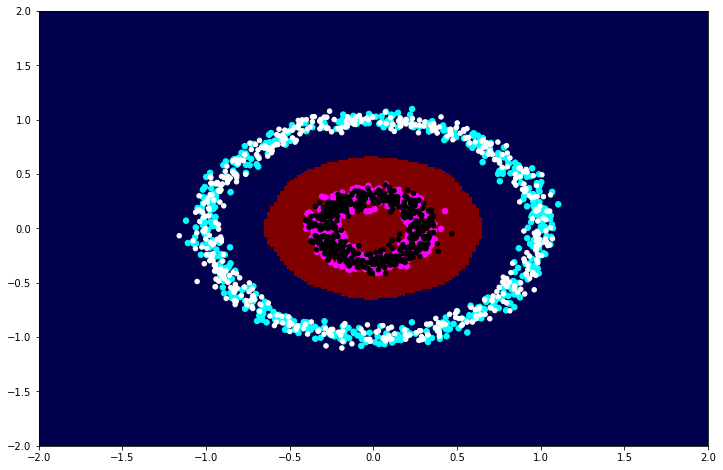

Score del modelo #1: 0.834
Score del modelo #2: 1.0
Score del modelo #3: 1.0
Score del modelo #4: 1.0
Score del modelo #5: 1.0


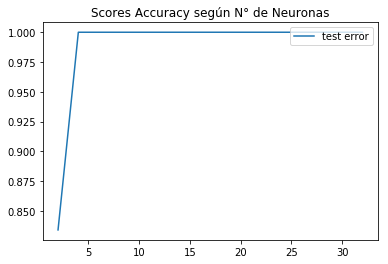

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
N_H=[2,4,8,16,32]
test_acc=[]
for n_h in N_H:
    model = Sequential()
    model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1)
    scores = model.evaluate(X_test, Y_test)
    test_acc.append(scores[1])
    plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

for i in range(len(test_acc)):
    print("Score del modelo #"+str(i+1)+": "+ str(test_acc[i]))
import matplotlib.pyplot as plt
ax = plt.gca()
plt.title('Scores Accuracy según N° de Neuronas')
ax.plot(N_H,test_acc,label='test error')
plt.legend(loc=1)
ax.set_xlim(ax.get_xlim()[::1])
plt.show() 


Se puede ver como aumentando el número de neuronas inmediatamente la capacidad de generalización se dispara, esto porque la red va ganando capacidad de generar límites polinomiales y con cuatro neuronas ya puede separar las clases a la perfección, se demuestra entonces experimentalmente, que no importaban los parametros que se le entregaran a la red, sino que importaba aun más el número de neuronas que utilizara.

<p>
(d) Demuestre experimentalmente que stump (árbol de clasificación de 1 nivel) no puede resolver satisfactoriamente
el problema anterior. Puede utilizar el criterio y la función de partición que prefiera. Sea
convincente: por ejemplo, intente modificar los parámetros de la máquina, reportando metricas que
permitan evaluar el desempeño del modelo en el problema con cada cambio efectuado. Adapte también
la función plot classifier para que represente gráficamente la solución encontrada por el árbol. Describa
y explique lo que observa, reportando gráficos de la solución sólo para algunos casos representativos.
</p>

Test Accuracy Gini = 0.670000
Profundidad: 1


C:\Users\Alfredo\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


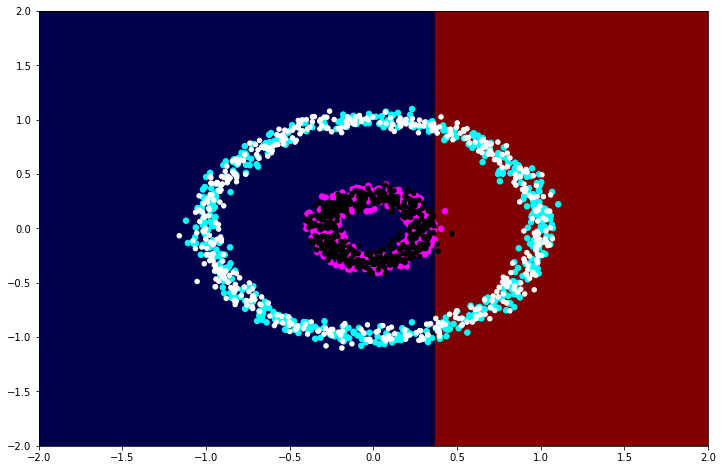

Test Accuracy Entropy = 0.658000
Profundidad: 1


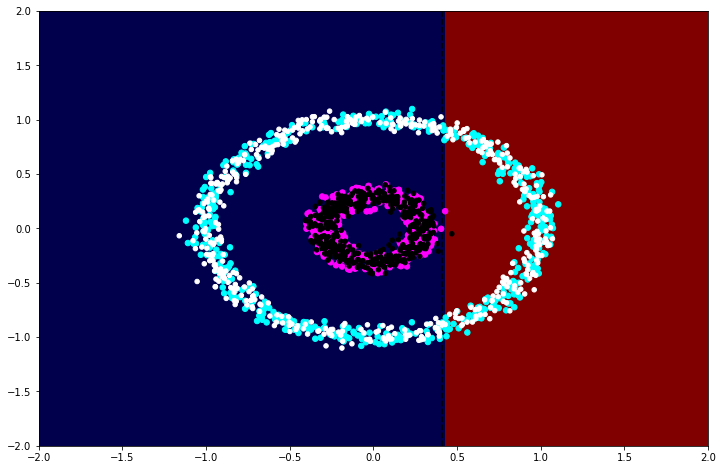

Test Accuracy Gini Random = 0.679000
Profundidad: 1
Test Accuracy Entropy Random = 0.679000
Profundidad: 1


In [47]:
from sklearn.tree import DecisionTreeClassifier as Tree
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)

print("Test Accuracy Gini = %f"%acc_test)
print("Profundidad: "+str(clf.tree_.max_depth))
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')


clf1=Tree(criterion='entropy',splitter='best',random_state=0,max_depth=1)
clf1.fit(X_train,Y_train)
acc_test = clf1.score(X_test,Y_test)

print("Test Accuracy Entropy = %f"%acc_test)
print("Profundidad: "+str(clf1.tree_.max_depth))
plot_classifier(clf1,X_train,Y_train,X_test,Y_test,'tree')

clf2=Tree(criterion='gini',splitter='random',random_state=0,max_depth=1)
clf2.fit(X_train,Y_train)
acc_test = clf2.score(X_test,Y_test)

print("Test Accuracy Gini Random = %f"%acc_test)
print("Profundidad: "+str(clf2.tree_.max_depth))

clf3=Tree(criterion='entropy',splitter='random',random_state=0,max_depth=1)
clf3.fit(X_train,Y_train)
acc_test = clf3.score(X_test,Y_test)

print("Test Accuracy Entropy Random = %f"%acc_test)
print("Profundidad: "+str(clf3.tree_.max_depth))

Ya que un DTC funciona partiendo el espacio de entrenamiento en regiones, si solo tiene profundidad 1, jamás sera posible que pueda dividr el espacio más de una vez con una linea constante, por lo que jamás podrá solucionar un problema no linealmente separable, queda demostrado también con la visualización, que cambiar el resto de los parametros solo afecta el lugar donde realiza el corte y no la forma del mismo.

<p>
(e) Demuestre experimentalmente que un árbol de clasificación de múltiples niveles puede resolver satisfactoriamente
el problema estudiado. Puede utilizar el criterio y la función de partición que prefiera,
pero puede optar tranquilamente por usar los hiper-parámetros que se entregan como referencia en el
código de ejemplo. Cambie el número de niveles admitidos en el árbol Nt entre 2 y 20, graficando el
error de entrenamiento y pruebas como función de Nt. Describa y explique lo que observa. Utilice la
función plot classifier, diseñada anteriormente, para construir gráficos de la solución en algunos casos
representativos.

</p>

Test Accuracy: 0.867
Profundidad: 2
Test Accuracy: 0.994
Profundidad: 4
Test Accuracy: 0.992
Profundidad: 8
Test Accuracy: 0.992
Profundidad: 10
Test Accuracy: 0.992
Profundidad: 12
Test Accuracy: 0.992
Profundidad: 14
Test Accuracy: 0.992
Profundidad: 16
Test Accuracy: 0.992
Profundidad: 18
Test Accuracy: 0.992
Profundidad: 20


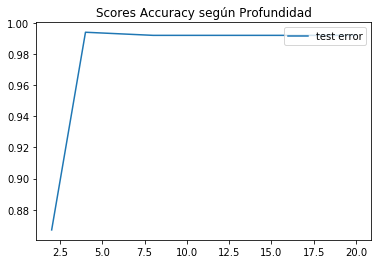

C:\Users\Alfredo\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


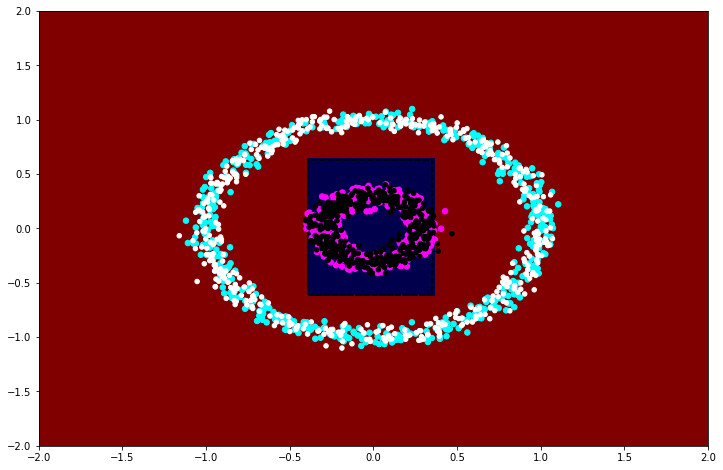

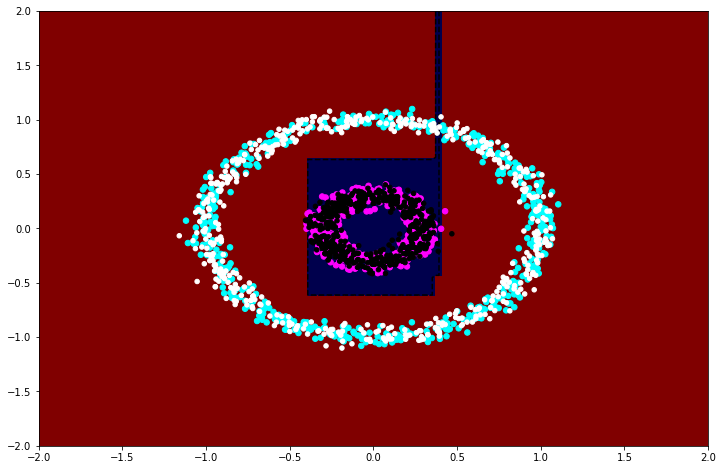

In [52]:
from sklearn.tree import DecisionTreeClassifier as Tree
N_T=[2,4,8,10,12,14,16,18,20]
test_acc = []
for n_t in N_T:
    clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=n_t)
    clf.fit(X_train,Y_train)
    acc_test = clf.score(X_test,Y_test)
    test_acc.append(acc_test)
    print("Test Accuracy: "+str(acc_test))
    print("Profundidad: "+ str(n_t))

import matplotlib.pyplot as plt
ax = plt.gca()
plt.title('Scores Accuracy según Profundidad')
ax.plot(N_T,test_acc,label='test error')
plt.legend(loc=1)
ax.set_xlim(ax.get_xlim()[::1])
plt.show() 

clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=4)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=20)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Por lo explicado en la pregunta anterior entonces se asume que con al menos cuatro decisiones podria lograr encerrar el circulo central en un cuadrilatero, tal y como se ve en el gráfico. Aun más con cuatro decisiones logró su mejor performance, pero luego de esto empezó a realizar particiones extrañas, como esa linea infinita que se ve en el segundo grafico, posiblemente sea por el resto de los parámetros distintos de la profundidad, que lo obligan a tomar un corte sub-optimo, pero eficaz.

<p>
(f) Como ya se demostró experimentalmente que este problema es linealmente inseperable, ahora se pide
experimentar otra alternativa. Para ello deberá realizar una proyección de los datos a un nuevo espacio
dimensional (manifold) en el cual se reconozcan sus patrones no lineales, para poder trabajarlos con
fronteras lineales. Utilice la técnica de PCA con la ayuda de un Kernel Gaussiano para extraer
sus vectores con dimensión infinita de mayor varianza.
</p>

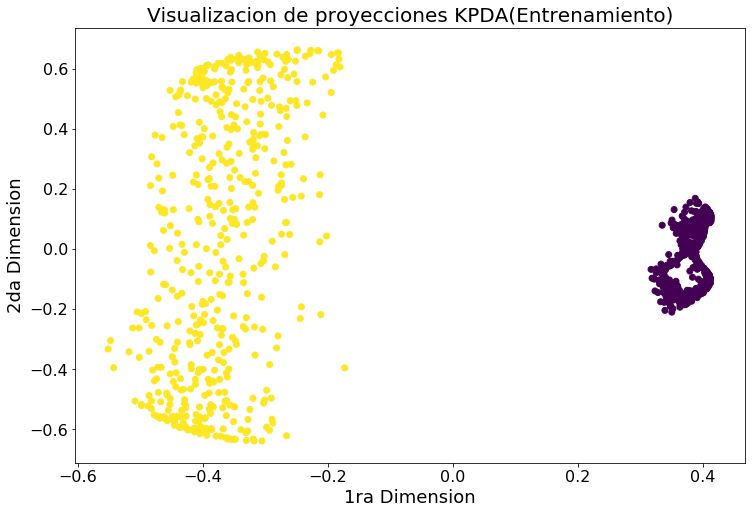

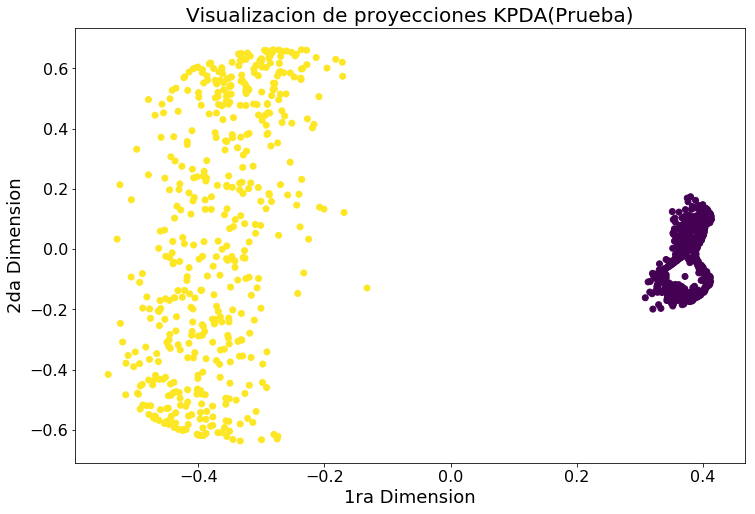

In [58]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

import matplotlib.pylab as plt
plt.figure(figsize=(12,8),facecolor='1.0') 
plt.scatter(Xkpca_train[:,0],Xkpca_train[:,1],c=Y_train)
plt.title("Visualizacion de proyecciones KPDA(Entrenamiento)", size=20)
plt.xlabel("1ra Dimension", size=18)
plt.ylabel("2da Dimension", size=18)
plt.tick_params(labelsize=16)
plt.show()


plt.figure(figsize=(12,8),facecolor='1.0') 
plt.scatter(Xkpca_test[:,0],Xkpca_test[:,1],c=Y_test)
plt.title("Visualizacion de proyecciones KPDA(Prueba)", size=20)
plt.xlabel("1ra Dimension", size=18)
plt.ylabel("2da Dimension", size=18)
plt.tick_params(labelsize=16)
plt.show()

Claramente ahora las clases si son linealmente separables, pero esto es debido a la delicada configuración de PCA, ya que el algorítmo no ve clases, es muy suceptible a pequeños cambios en su parámetro gamma y si este cambia solo un pcoo esta separación se pierde, por lo que no es recomendado utilizar PCA de buenas a primeras y este ejemplo fue muy afortunado. 

Fe de erratas: el nombre de ambos gráficos debería ser KPCA, no KPDA.

<p>(g) Ajuste un algoritmo de aprendizaje con fronteras lineal para los datos proyectados en este nuevo espacio
que captura sus componentes no lineales, muestre graficamente que el problema ahora puede ser resulto
con estos métodos. Reporte métricas para evaluar el desempeño, comente y concluya.
</p>

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(Xkpca_train,Y_train)
predTestLR = model.predict(Xkpca_test)
errorTestLR = accuracy_score(predTestLR,Y_test)
print("Score de LR(test): "+str(errorTestLR))

Score de LR(test): 1.0


Como se predijo ahora las clases son perfectamente separables y una regresión logística simple puedo realizar el trabajo a la perfección.

<h1>2. Bike Sharing: Predicción de Demanda Horaria</h1>
<p>
En esta sección simularemos nuestra participación en el desafío Bike Sharing Demand de Kaggle. El
objetivo es predecir la demanda de bicicletas sobre la red Capital Bikeshare de la ciudad de Washington,
D.C., en función de la hora del día y otras variables descritas en la tabla 1. En principio, y como muestra
la figura, la función es altamente no lineal y no determinista como función de la hora del día. Su objetivo
será entrenar un modelo para obtener un puntaje correspondiente al top-100 del “leaderboard” final, es
decir superior o igual a 0.37748.
</p>

<p>
(a) Cargue los datos de entrenamiento y pruebas como dataframes de pandas. Describa las variables involucradas
en el problema, explorando el tipo de datos de que se trata, el número de valores distintos y, si
corresponde, un gráfico (e.g. un histograma) que resuma su comportamiento. Su primera operación de
pre-procesamiento de datos será obtener la hora del día desde el campo fecha (que en este momento es
de tipo string), creando una nueva columna denominada hour y de tipo int. Para hacer esta operación
se concatenarán los dataframes de entrenamiento y pruebas y luego se volverán a separar manteniendo
la separación original.
</p>

In [ ]:
import pandas as pd
import numpy as np
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])
print '\nSummary - dataframe completo:\n'
print df.describe()
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])


<p>
(b) Entrene un árbol de regresión para resolver el problema usando parámetros por defecto. Con este
fin, construya una matriz $X_{train}$ de forma $n_{train} x$ $d1$ que contenga los datos de entrenamiento en sus
filas, seleccionando las columnas que desee/pueda utilizar para el entrenamiento. Implemente además, la
función de evaluación que hemos definido anteriormente para este problema. Evalúe el árbol de regresión
ajustado a los datos de entrenamiento sobre el conjunto de entrenamiento y pruebas. Construya un
gráfico que compare las predicciones con los valores reales. En este punto usted debiese tener un modelo
con puntaje del orden de 0.59, lo que lo dejará más o menos en la posición 2140 de la competencia.
</p>

In [ ]:
from sklearn.tree import DecisionTreeRegressor as Tree
import matplotlib.pyplot as plt
def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))
Xdf=df.ix[:,['season','holiday','workingday',
                'weather','temp','atemp',
                'humidity','windspeed','hour']]
Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print "SCORE TEST=%f"%score_test

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL TEST =%f"%kagg_test
plt.plot(Y_test,Y_pred_test,'.')
plt.show()


<p>
(c) Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones a los hiper-parámetros
del modelo. Por ejemplo, como estos modelos tienden a sobre-ajustar, podría intentar limitar la
profundidad del árbol (¿Por qué esto debiese ayudar?). Naturalmente, está absolutamente prohibido
tomar este tipo de decisiones en función del resultado de pruebas. Debe realizar estas elecciones evaluando
sobre el conjunto de validación. Si no desea utilizarlo, y prefiere implementar validación cruzada
u otra técnica automática, tiene la ventaja de poder usar el conjunto de validación como parte del
entrenamiento. Con estas modificaciones debiese poder mejorar su ranking en unas 300 posiciones.

</p>

In [ ]:
model = Tree(random_state=0,max_depth=20)
model.fit(X_train,Y_train)
Y_pred_val = model.predict(X_val)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL VAL =%f"%kagg_val

<p>
(d) Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones sobre la representación
utilizada para aprender desde los datos. Por ejemplo, los histogramas que construyó en el punto
(a) así como la forma especial de la función de evaluación, sugieren una cierta transformación de la
variable respuesta. Podría intentar también normalizando los datos o normalizando la respuesta. Otra
opción es intentar rescatar algo más acerca de la fecha (anteriormente sólo se extrajo la hora), como por
ejemplo el año o el día de la semana (’lunes’,’martes’, etc) que corresponde. Sea creativo, este paso le
debiese reportar un salto de calidad muy significativo. Una observación importante es que si hace una
transformación a la variable respuesta (por ejemplo raíz cuadrada), debe invertir esta transformación
antes de evaluar el desempeño con eval bikemodel (por ejemplo, elevar al cuadrado si tomó raíz cuadrada).
Con modificaciones de este tipo, podría mejorar su ranking en unas 1000 posiciones, entrando
ya al top-1000 con un score del orden de 0.45.
</p>

In [ ]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp',
                                'humidity','windspeed','hour','cday']]



<p>
(e) Entrene una SVM no lineal para resolver el problema midiendo el efecto de las distintas representaciones
que haya descubierto hasta este punto. Un detalle importante es que antes de entrenar la SVM sería
aconsejable hacer dos tipos de pre-procesamiento adicional de los datos: (i) codificar las variables
categóricas en un modo apropiado - por ejemplo como vector binario con un 1 en la posición del
valor adoptado-, (ii) escalar los atributos de modo que queden centrados y con rangos comparables.
Usando par´ametros por defecto para la SVM debiese obtener un score del orden de 0.344, quedando
definitivamente en el top-10 de la competencia.
</p>

In [ ]:
#load dataframes as before ...
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp',
                                'humidity','windspeed','hour','cday']]
#PASO IMPORTANTE MAS ABAJO ...
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday'])
Ydf=df.ix[:,'count']

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

from sklearn.svm import SVR
model = SVR()
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)


<p>
(f) Mejore la SVM definida en el punto anterior haciendo modificaciones a los hiper-parámetros de la
máquina. Naturalmente, está absolutamente prohibido tomar este
tipo de decisiones de diseño mirando el resultado de pruebas. Debe realizar estas elecciones evaluando
sobre el conjunto de validación. Si no desea utilizarlo, y prefiere implementar validación cruzada
u otra técnica automática, tiene la ventaja de poder usar el conjunto de validación como parte del
entrenamiento.
</p>

In [ ]:
model = SVR(C=1,epsilon=0.01)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val

<p>(g) Evalúe el efecto de utilizar el dataset de validación para entrenamiento y seleccionar los parámetros
estructurales del árbol de clasificación y la SVM usando validación cruzada. El código de ejemplo para
esto ha sido proporcionado en las tareas 1 y 2, pero se adjunta de nuevo a continuación
</p>

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    model = #define your model
    model.fit(Xm[train], ym[train])
    yhat_val = model.predict(Xm[val])
    ytrue_val = ym[val]
    score_fold = eval_bikemodel(yhat_val,ytrue_val)
    mse_cv += score_fold
mse_cv = mse_cv / 10

<p>(h) Evalúe el efecto de utilizar un ensamblado de 2 máquinas de aprendizaje para predecir la demanda
total de bicicletas. Un modelo se especializará en la predicción de la demanda de bicicletas de parte
de usuarios registrados y otra en la predicción de la demanda de usuarios casuales. Hay razones claras
para pensar que los patrones son distintos.
</p>

In [ ]:
Ydf=df.ix[:,'count'] #demanda total
Ydf=df.ix[:,'registered'] #demanda registrada
Ydf=df.ix[:,'casual'] #demanda casual


<p>(i) Evalúe el efecto de utilizar un algoritmo genérico para ensamblar máquinas de aprendizaje para predecir
la demanda total de bicicletas. Puede experimentar con una sola técnica (e.g. Random Forest), discuta
la evolución a medida que aumenta el número de máquinas.
</p>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,max_depth=max_depth,random_state=0)

<h1>3. Calidad de un vino</h1>
<p>
Dentro de las muchas variedades de vino existentes, algunas gustan más que otras, esto es debido al gusto
de una persona en particular o bien a la gran cantidad de químicos y procesos que se aplican a la producción
de vino. Para el área de negocios, el estimar cuál es la calidad de un vino en base a la apreciación del público
es una tarea bastante difícil.
</p>
<p>
Para esta actividad se trabajará con dos datasets asociados a las variantes tinto y blanco del vino portugués
”Vinho Verde”. Debido a temas privados solo se cuenta con las caracterísstcas fisioquímicas asociadas a un
vino en particular, los cuales corresponden a 11 atributos numéricos descritos en el siguiente link.
Este problema puede ser abordado como clasificación de 11 clases o de regresión, ya que el atributo a estimar,
quality, es un valor entero entre 0 y 10.
</p>

<p>
(a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si
es vino tinto o blanco. Describa el dataset a trabajar.
</p>

In [ ]:
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")
df = pd.concat([df_red,df_white], axis=0)
#genere atributo 'tipo'

<p>(b) Aborde este problema como si fuera de clasificación binaria para predecir si un vino es de buena calidad
o no, es decir, utilice las distintas características fisioquímicas presentes en los datos para estimar esta
etiqueta. Para esto cree las matrices de entrenamiento y de pruebas, además de la etiqueta para ambos
conjuntos, considerando como quality mayor a 5 un vino de buena calidad. El conjunto de pruebas
(25 %) será utilizado únicamente para verificar la calidad de los algoritmos a entrenar.</p>

In [ ]:
df['good_quality'] = [1 if q>5 else 0 for q in df.quality] #then remove 'quality' from df
#train and test split over df

<p>
(c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Puede variar los 
hiper-parámetros que prefiera, recuerde que las decisiones no pueden ser basadas mirando el conjunto
de pruebas. Debido al desbalanceo que se produce en las dos clases mida la métrica F1-score sobre
el conjunto de entrenamiento y de pruebas.
</p>

<p>
(d) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de Random Forest. Varíe la
cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen
del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.
<p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=, max_depth=,n_jobs=-1)
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

<p>
(e) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de AdaBoost. Varíe la
cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen
del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con
la técnica utilizada en d).
</p>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator=Tree(max_depth=), n_estimators=)


<p>
(f) Entrene alguna otra máquina de aprendizaje, elegida por usted, para resolver este problema. Elija los
hiper-par´ametros que estime convenientes intentando aumentar el F1-score obtenido por los algoritmos
anteriores. Compare y analice estas 4 maneras de resolver el problema definido en b).
</p>

<p>
(g) Defina un criterio para estimar la importancia de los distintos atributos en el ensamblado de Random
Forest, implementelo sobre alguno de los ensambladores entrenados en d), haga un ranking de
importancia de atributos ¿Es posible implementar este criterio sobre una técnica de boost como lo es
AdaBoost?
</p>

<h1>4. Reconocimiento de Imágenes Sign Gestures</h1>
<p>
MNIST es un dataset muy popular de dígitos escrito a mano que a servido para probar distintos algoritmos
de Machine Learning relacionados con Computer Vision. Buscando nuevos desafíos, investigadores generaron
un dataset que podría usarse eventualmente en aplicaciones reales, Sign Gestures, consta de imagenes del
lenguaje de señas, estas tienen una resolución de 28x28 pixeles representados en una escala de grises 0-255.
La versión utilizada se atribuye a y viene separada en 27455 ejemplos de entrenamiento y 7172 casos de
pruebas. Las clases son mutualmente excluyentes y corresponden a las letras del alfabeto (imagen en PDF original).
</p>
<p>
(a) Construya una función que cargue todos los datos de entrenamiento y pruebas del problema generando
como salida: (i) dos matrices $X_{tr}$, $Y_{tr}$, correspondientes a las imágenes y etiquetas de entrenamiento,
(ii) dos matrices $X_t$, $Y_t$, correspondientes a las imágenes y etiquetas de pruebas, y finalmente (iii) dos
matrices $X_v$, $Y_v$, correspondientes a imágenes y etiquetas que se usarán como conjunto de validación, es
decir para tomar decisiones de diseño acerca del modelo. Este último conjunto debe ser extraído desde
el conjunto de entrenamiento original y no debe superar las 7000 imágenes.
</p>

In [60]:
#Si validacion no puede superar 7000 imagenes entonces no puede ser mas del 25% del entrenamiento,
#para asegurarnos usaremos el 20

import pandas as pd
from sklearn.model_selection import train_test_split
import collections
def load_data():
    train = pd.read_csv('sign_mnist_train.csv')
    test = pd.read_csv('sign_mnist_test.csv')
    print("TRAIN+VALIDACION-----------------------------")
    train.shape
    train.info()
    train.describe()
    print("TEST-----------------------------------------")
    test.shape
    test.info()
    test.describe()
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    x_train, x_v, y_train, y_v = train_test_split(x_tr, y_tr, test_size=0.20, random_state=42)
    y_t = test['label']
    x_t = test.iloc[:,1:]
    return(x_train,x_v,x_t,y_train,y_v,y_t)
def contar(y):
    counter=collections.Counter(y)
    for i in range(len(counter.values())):
        print("{} = {}".format(counter.keys()[i],
                                 counter.values()[i]))
x_tr, x_v, x_t, y_tr, y_v , y_t = load_data()

TRAIN+VALIDACION-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
TEST-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [2]:
x_tr.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
22706,97,65,128,44,17,67,64,66,69,72,...,189,180,134,97,76,86,94,90,91,91
1231,215,216,217,223,206,176,176,191,106,122,...,133,133,132,132,134,124,167,124,23,140
531,144,145,146,147,150,150,151,151,151,150,...,78,107,183,187,171,160,131,134,101,72
21099,64,73,83,96,101,108,111,115,118,122,...,163,167,169,169,170,173,173,175,175,176
17752,83,88,57,75,101,37,17,63,69,74,...,87,71,52,95,183,176,180,182,184,186


In [16]:
y_tr.shape
#y_tr.info()
y_tr.describe()

count    21964.000000
mean        12.324121
std          7.298931
min          0.000000
25%          6.000000
50%         13.000000
75%         19.000000
max         24.000000
Name: label, dtype: float64

In [14]:
y_tr.head()

22706    10
1231     15
531       0
21099    10
17752    22
Name: label, dtype: int64

<p>
(b) Construya una función que escale apropiadamente las imágenes antes de trabajar. Experimente sólo
escalando los datos de acuerdo a la intensidad máxima de pixel (i.e., dividiendo por 255) y luego
centrando y escalándolos como en actividades anteriores.
</p>

In [61]:
import numpy as np
from sklearn.preprocessing import StandardScaler
"""
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)
"""
def escalador(x_tr, x_v, x_t,n=255.0):
    #Se regula la intensidad de todos por igual
    x_tr = np.divide(x_tr, float(n))
    x_v = np.divide(x_v, float(n))
    x_t = np.divide(x_t, float(n))
    #Se centran y escalan todos los datos usando como referencia el de entrenamiento
    #de la misma manera que en el entregable anterior
    std = StandardScaler(with_mean=True, with_std=True)
    std.fit(x_tr)
    X_train = std.transform(x_tr)
    X_val = std.transform(x_v)
    X_test = std.transform(x_t)
    
    return(X_train, X_val, X_test)
Sx_tr,Sx_v,Sx_t = escalador(x_tr,x_v,x_t)#con n 255 por defecto
print(Sx_tr[:10,:10])

[[-1.1761998  -2.09806037 -0.60012897 -2.85449181 -3.76039244 -2.53284031
  -2.7583446  -2.86682037 -2.90983062 -2.99411405]
 [ 1.67937834  1.68848848  1.68209134  1.8015662   1.33950431  0.48377907
   0.44027188  0.8488636  -1.77696957 -1.39475919]
 [-0.03880851 -0.09194177 -0.13855632 -0.17530759 -0.17157621 -0.23578152
  -0.27370501 -0.34015527 -0.39916559 -0.49912047]
 [-1.97479369 -1.89744851 -1.75406059 -1.50189395 -1.49377166 -1.39814862
  -1.41606804 -1.41027225 -1.40955517 -1.39475919]
 [-1.51499721 -1.52130128 -2.42077663 -2.0481354  -1.49377166 -3.36310253
  -4.10062115 -2.95599679 -2.90983062 -2.93013986]
 [ 0.73558556  0.68542918  0.65637435  0.60503733  0.55698047  0.45610366
   0.4117128   0.40298152  0.39689894  0.33254406]
 [ 0.20318964  0.28420546  0.32301633  0.31891086  0.34111182  0.34540203
   0.38315373  0.40298152  0.39689894  0.42850535]
 [ 0.56618686  0.56004677  0.52815973  0.50099134  0.44904614  0.40075285
   0.38315373  0.34353058  0.33566321  0.30055696]


<p>
(c) Diseñe, entrene y evalúe una red neuronal para el problema partir de la representación original de las
imágenes. Experimente con distintas arquitecturas, pre-procesamientos y métodos de entrenamiento,
midiendo el error de clasificación sobre el conjunto de validación. En base a esta última medida de
desempeño, decida qué modelo, de entre todos los evaluados, medirá finalmente en el conjunto de test.
Reporte y discuta los resultados obtenidos. Se espera que logre obtener un error de pruebas menor o
igual a 0.2.
</p>

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data sin pre-procesar
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr.values, to_categorical(y_tr), nb_epoch=100, batch_size=128, verbose=1,
                        validation_data=(x_v.values,to_categorical(y_v)))



C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/100
21964/21964 [==============================] - 1s 64us/step - loss: 15.3576 - acc: 0.0409 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 2/100
21964/21964 [==============================] - 1s 50us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 3/100
21964/21964 [==============================] - 1s 50us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 4/100
21964/21964 [==============================] - 1s 52us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 5/100
21964/21964 [==============================] - 1s 49us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 6/100
21964/21964 [==============================] - 1s 50us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 7/100
21964/21964 [==============================] - 1s 48us/step - loss: 15.4496 - acc: 0.0415 - val_los

Epoch 59/100
21964/21964 [==============================] - 1s 49us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 60/100
21964/21964 [==============================] - 1s 49us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 61/100
21964/21964 [==============================] - 1s 49us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 62/100
21964/21964 [==============================] - 1s 48us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 63/100
21964/21964 [==============================] - 1s 52us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 64/100
21964/21964 [==============================] - 1s 54us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 65/100
21964/21964 [==============================] - 1s 50us/step - loss: 15.4496 - acc: 0.0415 - val_loss: 15.5105 - val_acc: 0.0377
Epoch 66/100


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data sin pre-procesar con una capa menos y  epoch a la mitad
model1 = Sequential()
model1.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model1.add(Dense(25, init='uniform', activation='softmax'))
model1.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(x_tr.values, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1,
                        validation_data=(x_v.values,to_categorical(y_v)))

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 1s 68us/step - loss: 15.5046 - acc: 0.0373 - val_loss: 15.5663 - val_acc: 0.0342
Epoch 2/50
21964/21964 [==============================] - 1s 48us/step - loss: 15.5149 - acc: 0.0374 - val_loss: 15.5663 - val_acc: 0.0342
Epoch 3/50
21964/21964 [==============================] - 1s 49us/step - loss: 15.5149 - acc: 0.0374 - val_loss: 15.5663 - val_acc: 0.0342
Epoch 4/50
21964/21964 [==============================] - 1s 48us/step - loss: 15.5149 - acc: 0.0374 - val_loss: 15.5663 - val_acc: 0.0342
Epoch 5/50
21964/21964 [==============================] - 1s 48us/step - loss: 15.5149 - acc: 0.0374 - val_loss: 15.5663 - val_acc: 0.0342
Epoch 6/50
21964/21964 [==============================] - 1s 49us/step - loss: 15.5149 - acc: 0.0374 - val_loss: 15.5663 - val_acc: 0.0342
Epoch 7/50
21964/21964 [==============================] - 1s 53us/step - loss: 15.5149 - acc: 0.0374 - val_loss: 15.5

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data sin pre-procesar una capa extra con tanh- ahora se usa elu por relu
model2 = Sequential()
model2.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model2.add(Dense(30, init='uniform', activation='elu'))
model2.add(Dense(30, init='uniform', activation='tanh'))
model2.add(Dense(25, init='uniform', activation='softmax'))
model2.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_tr.values, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1,
                        validation_data=(x_v.values,to_categorical(y_v)))

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="elu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="tanh", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been rename

Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 2s 70us/step - loss: 3.1546 - acc: 0.0695 - val_loss: 3.1914 - val_acc: 0.0475
Epoch 2/50
21964/21964 [==============================] - 1s 53us/step - loss: 3.1622 - acc: 0.0526 - val_loss: 3.1729 - val_acc: 0.0514
Epoch 3/50
21964/21964 [==============================] - 1s 52us/step - loss: 3.0047 - acc: 0.0953 - val_loss: 2.7607 - val_acc: 0.1218
Epoch 4/50
21964/21964 [==============================] - 1s 52us/step - loss: 2.8467 - acc: 0.1217 - val_loss: 2.6315 - val_acc: 0.1537
Epoch 5/50
21964/21964 [==============================] - 1s 52us/step - loss: 2.7190 - acc: 0.1436 - val_loss: 2.9165 - val_acc: 0.1076
Epoch 6/50
21964/21964 [==============================] - 1s 52us/step - loss: 2.6474 - acc: 0.1572 - val_loss: 2.6558 - val_acc: 0.1382
Epoch 7/50
21964/21964 [==============================] - 1s 53us/step - loss: 2.6351 - acc: 0.1599 - val_loss: 2.6570 - val_acc:

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data pre-procesada una capa extra con tanh-
model3 = Sequential()
model3.add(Dense(30, input_dim=Sx_tr.shape[1], init='uniform', activation='relu'))
model3.add(Dense(30, init='uniform', activation='relu'))
model3.add(Dense(30, init='uniform', activation='tanh'))
model3.add(Dense(25, init='uniform', activation='softmax'))
model3.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(Sx_tr, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1,
                    validation_data=(Sx_v,to_categorical(y_v)))

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="tanh", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renam

Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 2s 78us/step - loss: 3.2123 - acc: 0.0502 - val_loss: 3.2064 - val_acc: 0.0479
Epoch 2/50
21964/21964 [==============================] - 1s 50us/step - loss: 3.2027 - acc: 0.0471 - val_loss: 3.1989 - val_acc: 0.0486
Epoch 3/50
21964/21964 [==============================] - 1s 50us/step - loss: 3.1962 - acc: 0.0492 - val_loss: 3.1930 - val_acc: 0.0586
Epoch 4/50
21964/21964 [==============================] - 1s 50us/step - loss: 3.1880 - acc: 0.0601 - val_loss: 3.1777 - val_acc: 0.0688
Epoch 5/50
21964/21964 [==============================] - 1s 51us/step - loss: 3.1452 - acc: 0.0621 - val_loss: 3.1127 - val_acc: 0.0639
Epoch 6/50
21964/21964 [==============================] - 1s 51us/step - loss: 3.0648 - acc: 0.0891 - val_loss: 3.0004 - val_acc: 0.0894
Epoch 7/50
21964/21964 [==============================] - 1s 51us/step - loss: 2.8548 - acc: 0.1054 - val_loss: 2.7215 - val_acc:

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data pre-procesada una capa menos a la anterior y una capa ahora usa elu en vez de relu
model4 = Sequential()
model4.add(Dense(30, input_dim=Sx_tr.shape[1], init='uniform', activation='relu'))
model4.add(Dense(30, init='uniform', activation='elu'))
model4.add(Dense(25, init='uniform', activation='softmax'))
model4.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model4.fit(Sx_tr, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1,
                    validation_data=(Sx_v,to_categorical(y_v)))

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="elu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 2s 74us/step - loss: 3.1812 - acc: 0.1058 - val_loss: 3.0777 - val_acc: 0.1109
Epoch 2/50
21964/21964 [==============================] - 1s 53us/step - loss: 2.6966 - acc: 0.1799 - val_loss: 2.2330 - val_acc: 0.2879
Epoch 3/50
21964/21964 [==============================] - 1s 52us/step - loss: 1.8607 - acc: 0.3869 - val_loss: 1.5684 - val_acc: 0.4821
Epoch 4/50
21964/21964 [==============================] - 1s 53us/step - loss: 1.3030 - acc: 0.5651 - val_loss: 1.1099 - val_acc: 0.6217
Epoch 5/50
21964/21964 [==============================] - 1s 52us/step - loss: 0.9110 - acc: 0.6908 - val_loss: 0.7767 - val_acc: 0.7385
Epoch 6/50
21964/21964 [==============================] - 1s 54us/step - loss: 0.6429 - acc: 0.7971 - val_loss: 0.5532 - val_acc: 0.8312
Epoch 7/50
21964/21964 [==============================] - 1s 52us/step - loss: 0.4528 - acc: 0.8669 - val_loss: 0.4136 - val_acc:

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data pre-procesada capa inicial con activacion lineal
########Con LINEAL al final no aprende :O####################
model5 = Sequential()
model5.add(Dense(30, input_dim=Sx_tr.shape[1], init='uniform', activation='linear'))
model5.add(Dense(30, init='uniform', activation='elu'))
model5.add(Dense(25, init='uniform', activation='softmax'))
model5.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model5.fit(Sx_tr, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1,
                    validation_data=(Sx_v,to_categorical(y_v)))

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="linear", kernel_initializer="uniform")`
  import sys
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="elu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 2s 74us/step - loss: 2.9809 - acc: 0.1403 - val_loss: 2.5406 - val_acc: 0.2001
Epoch 2/50
21964/21964 [==============================] - 1s 55us/step - loss: 2.0246 - acc: 0.3442 - val_loss: 1.6692 - val_acc: 0.4409
Epoch 3/50
21964/21964 [==============================] - 1s 53us/step - loss: 1.4119 - acc: 0.5270 - val_loss: 1.2359 - val_acc: 0.5830
Epoch 4/50
21964/21964 [==============================] - 1s 54us/step - loss: 1.0372 - acc: 0.6475 - val_loss: 0.9296 - val_acc: 0.6724
Epoch 5/50
21964/21964 [==============================] - 1s 54us/step - loss: 0.7752 - acc: 0.7468 - val_loss: 0.6941 - val_acc: 0.7705
Epoch 6/50
21964/21964 [==============================] - 1s 57us/step - loss: 0.5764 - acc: 0.8217 - val_loss: 0.5204 - val_acc: 0.8403
Epoch 7/50
21964/21964 [==============================] - 1s 54us/step - loss: 0.4240 - acc: 0.8776 - val_loss: 0.3819 - val_acc:

In [21]:
S2x_tr,S2x_v,S2x_t = escalador(x_tr,x_v,x_t,n=100.0)#con n 100, no tiene mucha diferencia con hacer n 255
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data pre-procesada una capa menos a la anterior y una capa ahora usa elu en vez de relu
model6 = Sequential()
model6.add(Dense(30, input_dim=S2x_tr.shape[1], init='uniform', activation='relu'))
model6.add(Dense(30, init='uniform', activation='elu'))
model6.add(Dense(25, init='uniform', activation='softmax'))
model6.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model6.fit(S2x_tr, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1,
                    validation_data=(S2x_v,to_categorical(y_v)))

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="elu", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 2s 74us/step - loss: 3.1829 - acc: 0.1035 - val_loss: 3.0938 - val_acc: 0.1457
Epoch 2/50
21964/21964 [==============================] - 1s 57us/step - loss: 2.7606 - acc: 0.1698 - val_loss: 2.2827 - val_acc: 0.2657
Epoch 3/50
21964/21964 [==============================] - 1s 53us/step - loss: 1.8727 - acc: 0.3763 - val_loss: 1.5796 - val_acc: 0.4626
Epoch 4/50
21964/21964 [==============================] - 1s 52us/step - loss: 1.2998 - acc: 0.5705 - val_loss: 1.0871 - val_acc: 0.6323
Epoch 5/50
21964/21964 [==============================] - 1s 53us/step - loss: 0.8860 - acc: 0.7166 - val_loss: 0.7680 - val_acc: 0.7514
Epoch 6/50
21964/21964 [==============================] - 1s 55us/step - loss: 0.6157 - acc: 0.8134 - val_loss: 0.5432 - val_acc: 0.8419
Epoch 7/50
21964/21964 [==============================] - 1s 53us/step - loss: 0.4245 - acc: 0.8905 - val_loss: 0.3831 - val_acc:

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
#Con la data pre-procesada capa inicial con activacion lineal con loss categorical_hinge no supero 0,49 
model7 = Sequential()
model7.add(Dense(30, input_dim=Sx_tr.shape[1], init='uniform', activation='relu'))
model7.add(Dense(30, init='uniform', activation='elu'))
model7.add(Dense(25, init='uniform', activation='softmax'))
model7.compile(optimizer=SGD(lr=0.05), loss='categorical_hinge', metrics=['accuracy'])
model7.fit(Sx_tr, to_categorical(y_tr), nb_epoch=150, batch_size=128, verbose=1,
                    validation_data=(Sx_v,to_categorical(y_v)))

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="elu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/150
21964/21964 [==============================] - 2s 78us/step - loss: 1.0008 - acc: 0.0342 - val_loss: 1.0007 - val_acc: 0.0412
Epoch 2/150
21964/21964 [==============================] - 1s 50us/step - loss: 1.0007 - acc: 0.0387 - val_loss: 1.0006 - val_acc: 0.0450
Epoch 3/150
21964/21964 [==============================] - 1s 51us/step - loss: 1.0006 - acc: 0.0481 - val_loss: 1.0005 - val_acc: 0.0534
Epoch 4/150
21964/21964 [==============================] - 1s 59us/step - loss: 1.0005 - acc: 0.0577 - val_loss: 1.0005 - val_acc: 0.0634
Epoch 5/150
21964/21964 [==============================] - 1s 51us/step - loss: 1.0004 - acc: 0.0690 - val_loss: 1.0004 - val_acc: 0.0745
Epoch 6/150
21964/21964 [==============================] - 1s 49us/step - loss: 1.0004 - acc: 0.0821 - val_loss: 1.0004 - val_acc: 0.0887
Epoch 7/150
21964/21964 [==============================] - 1s 51us/step - loss: 1.0004 - acc: 0.0963 - val_loss: 1.0003 - v

Epoch 118/150
21964/21964 [==============================] - 1s 59us/step - loss: 0.9574 - acc: 0.4973 - val_loss: 0.9595 - val_acc: 0.4826
Epoch 119/150
21964/21964 [==============================] - 1s 59us/step - loss: 0.9573 - acc: 0.4943 - val_loss: 0.9594 - val_acc: 0.4872
Epoch 120/150
21964/21964 [==============================] - 1s 58us/step - loss: 0.9572 - acc: 0.4946 - val_loss: 0.9593 - val_acc: 0.4830
Epoch 121/150
21964/21964 [==============================] - 1s 58us/step - loss: 0.9571 - acc: 0.4939 - val_loss: 0.9592 - val_acc: 0.4817
Epoch 122/150
21964/21964 [==============================] - 1s 60us/step - loss: 0.9569 - acc: 0.4935 - val_loss: 0.9590 - val_acc: 0.4764
Epoch 123/150
21964/21964 [==============================] - 1s 58us/step - loss: 0.9567 - acc: 0.4921 - val_loss: 0.9587 - val_acc: 0.4762
Epoch 124/150
21964/21964 [==============================] - 1s 57us/step - loss: 0.9563 - acc: 0.4871 - val_loss: 0.9583 - val_acc: 0.4679
Epoch 125/150
21964/

In [64]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical
#Con la data pre-procesada una capa
#rprop is equivalent to using the gradient but also dividing by the size of the gradient.
"""
– The problem with mini-batch rprop is that we divide by a different number 
for each mini-batch. So why not force the number we divide by to be very 
similar for adjacent mini-batches?
rmsprop: Keep a moving average of the squared gradient for each weight"""
model8 = Sequential()
model8.add(Dense(30, input_dim=Sx_tr.shape[1], init='uniform', activation='relu'))
model8.add(Dense(28, init='uniform', activation='elu'))
model8.add(Dense(25, init='uniform', activation='softmax'))
model8.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model8.fit(Sx_tr, to_categorical(y_tr), nb_epoch=50, batch_size=128, verbose=1,
                validation_data=(Sx_v,to_categorical(y_v)))

###NOS QUEDAMOS CON ESTA, logró val_acc 1 de manera consistente

C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(28, activation="elu", kernel_initializer="uniform")`
  
C:\Users\Alfredo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Users\Alfredo\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 3s 124us/step - loss: 2.1116 - acc: 0.3268 - val_loss: 1.4568 - val_acc: 0.4955
Epoch 2/50
21964/21964 [==============================] - 1s 59us/step - loss: 1.0677 - acc: 0.6487 - val_loss: 0.8080 - val_acc: 0.7470
Epoch 3/50
21964/21964 [==============================] - 1s 59us/step - loss: 0.5801 - acc: 0.8302 - val_loss: 0.4236 - val_acc: 0.8811
Epoch 4/50
21964/21964 [==============================] - 1s 57us/step - loss: 0.2962 - acc: 0.9260 - val_loss: 0.2144 - val_acc: 0.9439
Epoch 5/50
21964/21964 [==============================] - 1s 59us/step - loss: 0.1358 - acc: 0.9733 - val_loss: 0.0893 - val_acc: 0.9867
Epoch 6/50
21964/21964 [==============================] - 1s 58us/step - loss: 0.0541 - acc: 0.9946 - val_loss: 0.0356 - val_acc: 0.9965
Epoch 7/50
21964/21964 [==============================] - 1s 59us/step - loss: 0.0205 - acc: 0.9985 - val_loss: 0.0128 - val_acc

In [65]:
"""
from sklearn.metrics import accuracy_score
predicciones = model8.predict(Sx_t)
accuracyTest = accuracy_score(predicciones,y_t)
erroT = 1 - accuracyTest
print("La mejor red encontrada fue el modelo 8.")
print("Error de Pruebas de la mejor red encontrada: "+str(errorT))
"""
#predicciones = model8.predict(Sx_t)
model8.evaluate(Sx_t, to_categorical(y_t), batch_size=128, verbose=1, sample_weight=None)


7172/7172 [==============================] - 0s 33us/step


[2.988157609954468, 0.71932515337423308]

<p>(d) Para la mejor red entrenada anteriormente construya la matriz de confusión de las distintas clases, para
asi visualizar cuáles son las clases más difíciles de clasificar y con cuáles se confunden. Comente.
</p>

In [66]:
from sklearn.metrics import confusion_matrix
y_pred = model8.predict(Sx_t)
pred =[]
for fila in y_pred:
    pred.append(np.argmax(fila))
confusion_matrix(y_t, pred)


array([[310,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 390,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  41,   0,   1,   0,   0],
       [  0,   0, 271,   0,   0,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   0,   0,   0,  17,   0],
       [  0,   0,   0, 223,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  21,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0, 476,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,  21,   0,   0,   0,   0,   0,   0],
       [  0,   0,  21,   0,   0, 205,   0,   0,   0,  21,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 242,   3,   0,   0,   0,   0,   0,
         21,   0,  62,   0,   0,  20,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  20

<p>
(e) Entrene una SVM no lineal sobre los pixeles con y sin pre-procesamiento. Puede utilizar el conjunto de
validación para seleccionar hiper-parámetros, como el nivel de regularización aplicado y/o la función
de kernel a utilizar.
</p>

In [67]:
#Esto se demora entre 20-30 min en correr, hay que sintonizar los parametros usando x_v y Sx_v con y_v
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_tr, y_tr) 
clf2 = SVC()
clf2.fit(Sx_tr, y_tr) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
from sklearn.metrics import accuracy_score
predTest1 = clf.predict(x_v)
predTest2 = clf2.predict(Sx_v)
acc1 = accuracy_score(predTest1,y_v)
acc2 = accuracy_score(predTest2,y_v)
print("Score Validacion sin Pre-Procesamiento: "+str(acc1))
print("Score Validacion Pre-Procesamiento: "+str(acc2))

Score Validacion sin Pre-Procesamiento: 0.226552540521
Score Validacion Pre-Procesamiento: 0.99981788381


In [68]:
from sklearn.metrics import accuracy_score
predTest1 = clf.predict(x_t)
predTest2 = clf2.predict(Sx_t)
acc1 = accuracy_score(predTest1,y_t)
acc2 = accuracy_score(predTest2,y_t)
print("Score sin Pre-Procesamiento: "+str(acc1))
print("Score con Pre-Procesamiento: "+str(acc2))

Score sin Pre-Procesamiento: 0.0200780814278
Score con Pre-Procesamiento: 0.842861126603


<p>
(f) Entrene una árbol de clasificación sobre los pixeles con y sin pre-procesamiento. Puede utilizar el
conjunto de validación para seleccionar hiper-parámetros, como la profundidad máxima del árbol.
</p>

In [72]:
from sklearn.tree import DecisionTreeClassifier as DTC
arbol = DTC()
arbol.fit(x_tr,y_tr)

arbol2 = DTC()
arbol2.fit(Sx_tr,y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
predT1 = arbol.predict(x_v)
predT2 = arbol2.predict(Sx_v)


from sklearn.metrics import accuracy_score

errorT1 = accuracy_score(predT1,y_v)
print("Score Validacion de DTC Sin Pre-Proc: "+str(errorT1))

errorT2 = accuracy_score(predT2,y_v)
print("Score Validacion de DTC Con Pre-Proc: "+str(errorT2))

Score Validacion de DTC Sin Pre-Proc: 0.876160990712
Score Validacion de DTC Con Pre-Proc: 0.874157712621


In [74]:
predT1 = arbol.predict(x_t)
predT2 = arbol2.predict(Sx_t)


from sklearn.metrics import accuracy_score

errorT1 = accuracy_score(predT1,y_t)
print("Score de DTC Sin Pre-Proc: "+str(errorT1))

errorT2 = accuracy_score(predT2,y_t)
print("Score de DTC Con Pre-Proc: "+str(errorT2))

Score de DTC Sin Pre-Proc: 0.445203569437
Score de DTC Con Pre-Proc: 0.443809258226
